In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


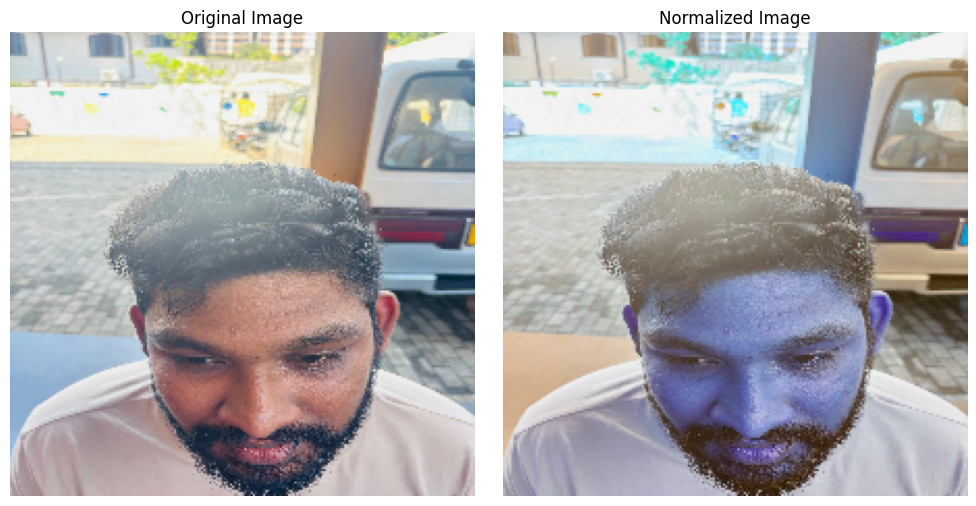

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path =r'/content/drive/MyDrive/Face/Chathuranga/WhatsApp Image 2024-10-25 at 17.41.17_1803c251.jpg'
# Load the image using cv2.imread()
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (224,224))

# Normalize the image to the range [0, 1]
normalized_image = image_resized / 255.0

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title("Normalized Image")
plt.axis("off")

plt.tight_layout()
plt.show()

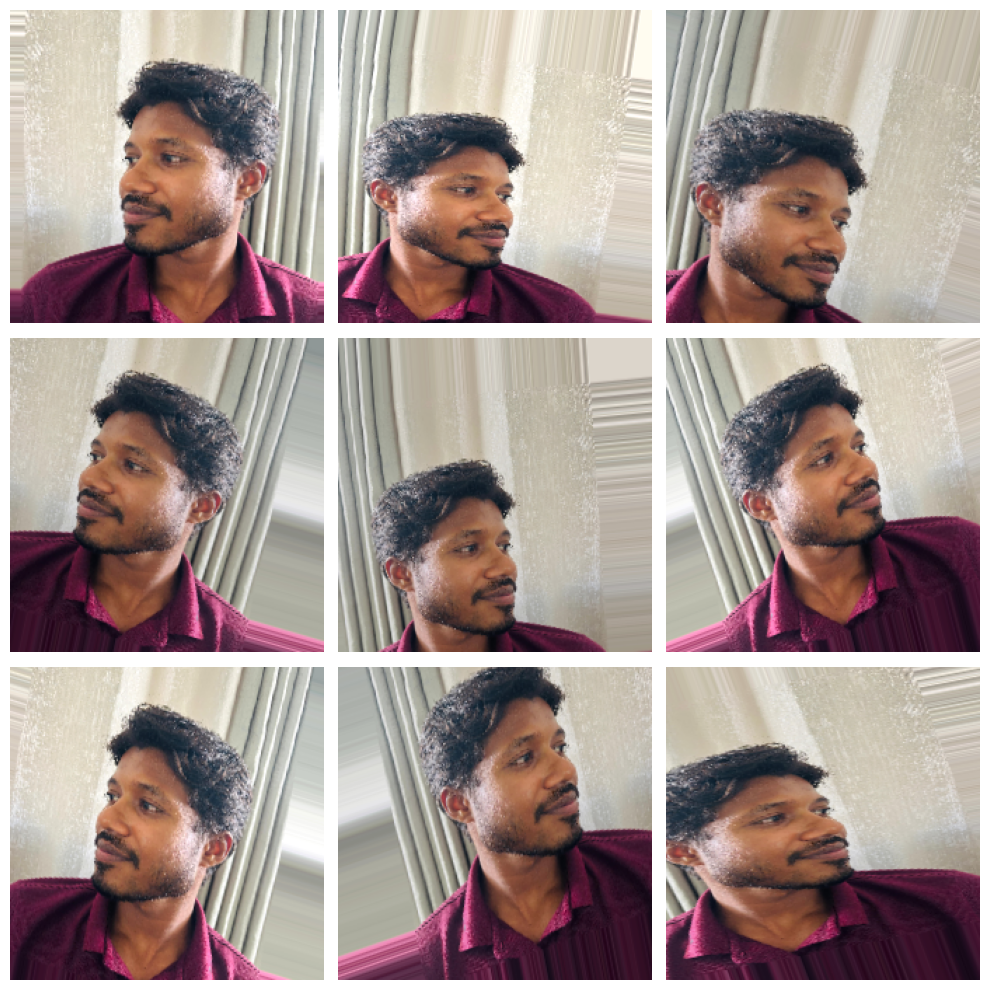

In [5]:
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)


image_path =r"/content/drive/MyDrive/Face/Abdur/WhatsApp Image 2024-10-30 at 21.45.16_ef1d82b5.jpg"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)


augmented_images = datagen.flow(img_array, batch_size=1)

# Visualize the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = next(augmented_images)
    aug_img = batch[0]
    plt.imshow(aug_img)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import shutil

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Face/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Face/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Face/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)



# Load the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-40]:
    layer.trainable = False

x = base_model.output

x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

predictions = Dense(15, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Found 1170 images belonging to 15 classes.
Found 390 images belonging to 15 classes.
Found 390 images belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.3286 - loss: 2.9047 - val_accuracy: 0.1769 - val_loss: 2.9063 - learning_rate: 1.0000e-04
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.8926 - loss: 0.9609 - val_accuracy: 0.3744 - val_loss: 2.6186 - learning_rate: 1.0000e-04
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.9518 - loss: 0.7464 - val_accuracy: 0.4410 - val_loss: 2.3974 - learning_rate: 1.0000e-04
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.9820 - loss: 0.6519 - val_accuracy: 0.5436 - val_loss: 2.1281 - learning_rate: 1.0000e-04
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9789 - loss: 0.6309 - val_accuracy: 0.6000 - val_loss: 1.9256 - learning_rate: 1.0000e-04
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9860 - loss: 0.6060 - val_accuracy: 0.6385 - val_loss: 1.7821 - learning_rate: 1.0000e-04
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.9949 

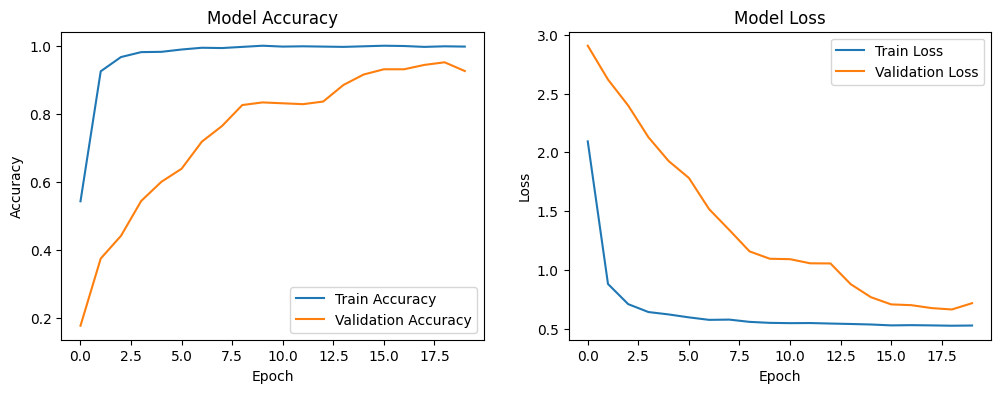

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

In [14]:
model.save('mobileNet_face_model_final_org123.h5')


model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 10,602,607 (40.45 MB)

 Trainable params: 3,341,711 (12.75 MB)

 Non-trainable params: 577,472 (2.20 MB)

 Optimizer params: 6,683,424 (25.50 MB)

In [17]:
from google.colab import files

files.download('/content/mobileNet_face_model_final_org123.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9496 - loss: 0.6749
Validation Loss: 0.6640241742134094
Validation Accuracy: 0.9512820243835449


13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step
Confusion Matrix:
[[24  1  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 20  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 26]]


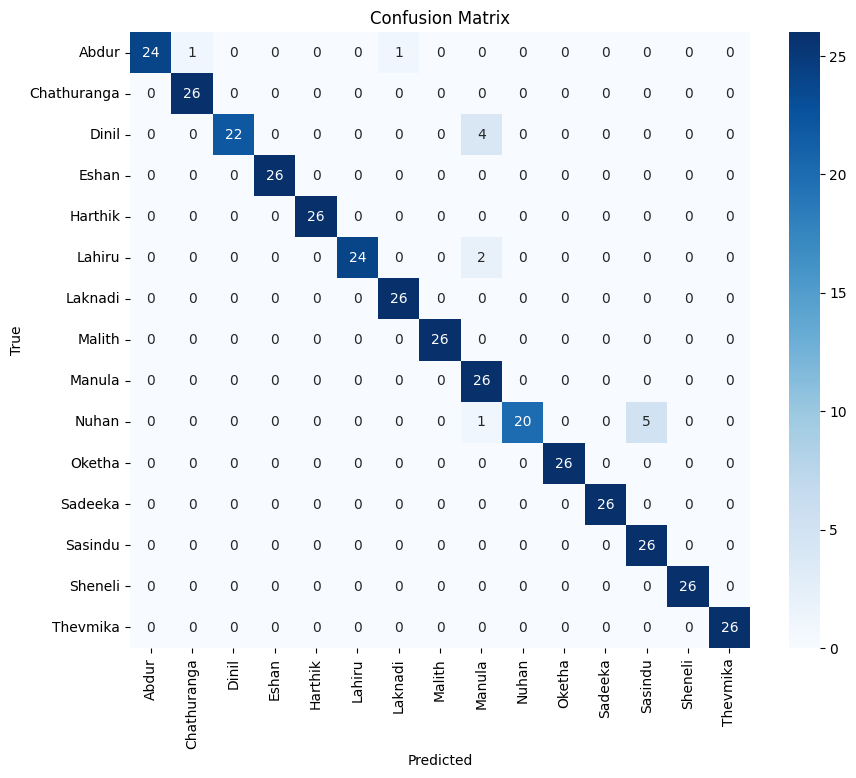

Classification Report:
              precision    recall  f1-score   support

       Abdur       1.00      0.92      0.96        26
 Chathuranga       0.96      1.00      0.98        26
       Dinil       1.00      0.85      0.92        26
       Eshan       1.00      1.00      1.00        26
     Harthik       1.00      1.00      1.00        26
      Lahiru       1.00      0.92      0.96        26
     Laknadi       0.96      1.00      0.98        26
      Malith       1.00      1.00      1.00        26
      Manula       0.79      1.00      0.88        26
       Nuhan       1.00      0.77      0.87        26
      Oketha       1.00      1.00      1.00        26
     Sadeeka       1.00      1.00      1.00        26
     Sasindu       0.84      1.00      0.91        26
     Sheneli       1.00      1.00      1.00        26
    Thevmika       1.00      1.00      1.00        26

    accuracy                           0.96       390
   macro avg       0.97      0.96      0.96       390
wei

In [16]:
# Performance Evaluation on Test Data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(class_report)

# Test Accuracy
test_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")
